# Graph communities

In this notebook, we explored graph communities.

In the study of complex networks, a network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

# 1. Import packages and data

pip install --upgrade networkx[default]

pip install opencv-python

pip install libpysal

pip install contextily

pip install shapely 

pip install geopandas

In [1]:
import os
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import cv2

# Delaunay and Voronoï
import libpysal
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap

# for the network
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm

Graph :

In [2]:
input_graph = "./../delaunay_graphs"

In [3]:
delaunay_graph_A1 = nx.read_gexf(f"{input_graph}/delaunay_graph_A1.gexf")
delaunay_graph_B2 = nx.read_gexf(f"{input_graph}/delaunay_graph_B2.gexf")
delaunay_graph_C3 = nx.read_gexf(f"{input_graph}/delaunay_graph_C3.gexf")
delaunay_graph_D4 = nx.read_gexf(f"{input_graph}/delaunay_graph_D4.gexf")

Nuclei coordinates :

In [4]:
input_coordinates = "./../output_coords"

In [5]:
with open(f"{input_coordinates}/nucleus_coords_A1_wo_background.json", 'r') as file:
    nuclei_coords_A1 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_B2_wo_background.json", 'r') as file:
    nuclei_coords_B2 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_C3_wo_background.json", 'r') as file:
    nuclei_coords_C3 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_D4_wo_background.json", 'r') as file:
    nuclei_coords_D4 = json.load(file)

In [6]:
pos_A1 = dict(zip(delaunay_graph_A1.nodes, nuclei_coords_A1))
pos_B2 = dict(zip(delaunay_graph_B2.nodes, nuclei_coords_B2))
pos_C3 = dict(zip(delaunay_graph_C3.nodes, nuclei_coords_C3))
pos_D4 = dict(zip(delaunay_graph_D4.nodes, nuclei_coords_D4))

Images :

In [7]:
input_images = "./../input_images"

In [8]:
img_A1 = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_images}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_images}/PanCN_AVD_61VQ_0158_D4.jpg')

In [9]:
image_name_A1 = "A1"
image_name_B2 = "B2"
image_name_C3 = "C3"
image_name_D4 = "D4"

Output files :

In [7]:
#output_image_workspace = "./../output_images/cluster_by_degree_graph"
#os.makedirs(output_image_workspace, exist_ok=True)
#output_image_sb =  "/sbgenomics/output-files/data/cluster_by_degree_graph"
#os.makedirs(output_image_sb, exist_ok=True)

# 2. Communities with Delaunay graphs

# 2.1. Bipartitions

"kernighan_lin_bisection" algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

node_colors : https://stackoverflow.com/questions/55533363/assigning-two-separate-colours-for-a-list-of-nodes-in-a-graph

### A1 :

In [12]:
bipart_A1 = nx.community.kernighan_lin_bisection(delaunay_graph_A1, seed = 123)

In [29]:
node_colors = []
for n in delaunay_graph_A1.nodes():
    if n in list(bipart_A1[1]):
        node_colors.append('red')
    else:
        node_colors.append('blue')
node_colors

['red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blu

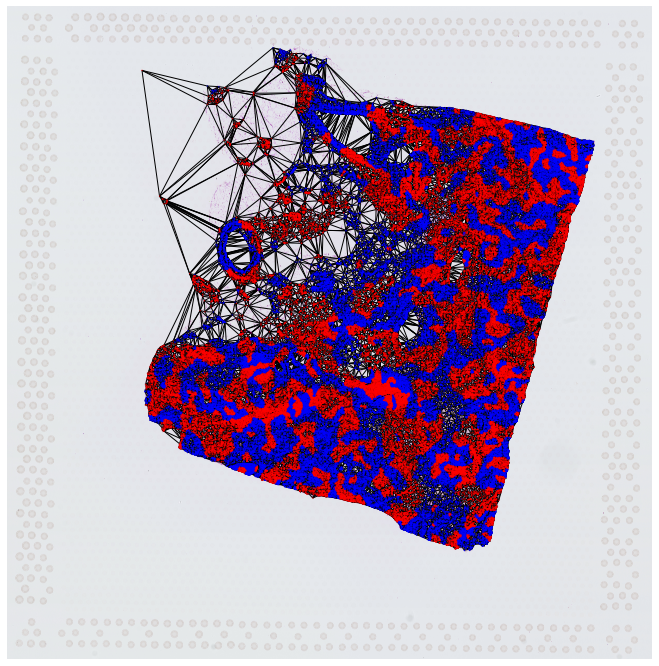

In [37]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() # get the current size of the figure in inches
# construct graph
sc =nx.draw(
    delaunay_graph_A1, pos = pos_A1, with_labels = False,
    node_size = 0.1, 
    #vmin = vmin,
    #vmax = vmax,
    node_color = node_colors,
    #cmap = ("blue", "red"),
    ax = ax
)
# add colorbar
#sm = plt.cm.ScalarMappable(cmap=plt.cm.spring, norm=plt.Normalize(vmin = vmin, vmax=vmax))
#plt.colorbar(sm)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
#fig.show()
plt.imshow(img_A1)

### B2 :

In [39]:
bipart_B2 = nx.community.kernighan_lin_bisection(delaunay_graph_B2, seed = 123)

In [40]:
node_colors_B2 = []
for n in delaunay_graph_B2.nodes():
    if n in list(bipart_B2[1]):
        node_colors_B2.append('red')
    else:
        node_colors_B2.append('blue')

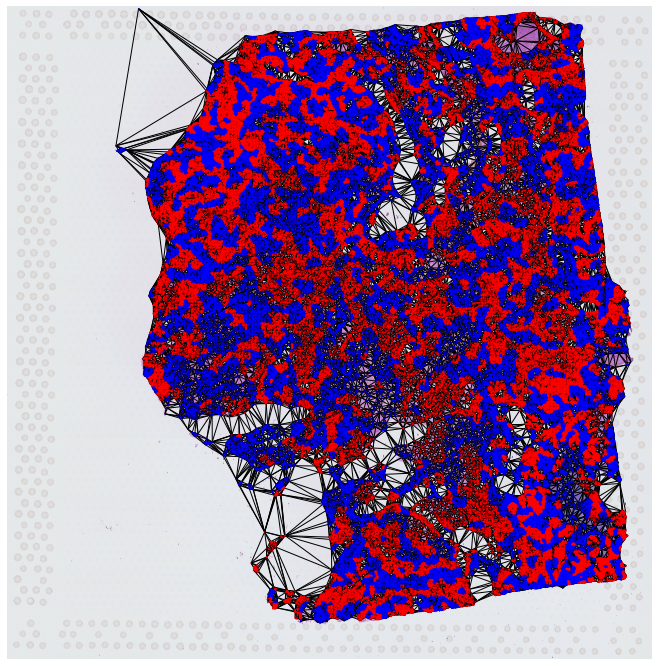

In [42]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() # get the current size of the figure in inches
# construct graph
sc =nx.draw(
    delaunay_graph_B2, pos = pos_B2, with_labels = False,
    node_size = 0.1, 
    node_color = node_colors_B2,
    ax = ax
)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
plt.imshow(img_B2)

### C3 :

In [43]:
bipart_C3 = nx.community.kernighan_lin_bisection(delaunay_graph_C3, seed = 123)

In [44]:
node_colors_C3 = []
for n in delaunay_graph_C3.nodes():
    if n in list(bipart_C3[1]):
        node_colors_C3.append('red')
    else:
        node_colors_C3.append('blue')

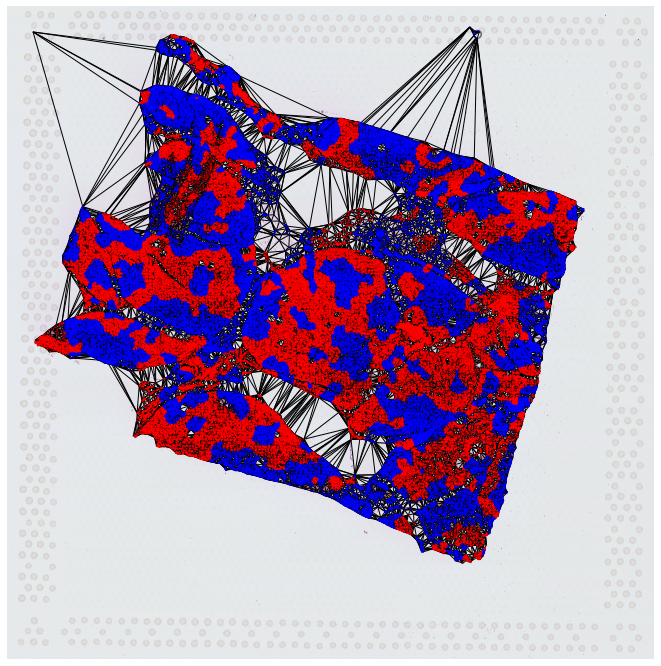

In [45]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() # get the current size of the figure in inches
# construct graph
sc =nx.draw(
    delaunay_graph_C3, pos = pos_C3, with_labels = False,
    node_size = 0.1, 
    node_color = node_colors_C3,
    ax = ax
)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
plt.imshow(img_C3)

### D4 :

In [46]:
bipart_D4 = nx.community.kernighan_lin_bisection(delaunay_graph_D4, seed = 123)

In [47]:
node_colors_D4 = []
for n in delaunay_graph_D4.nodes():
    if n in list(bipart_D4[1]):
        node_colors_D4.append('red')
    else:
        node_colors_D4.append('blue')

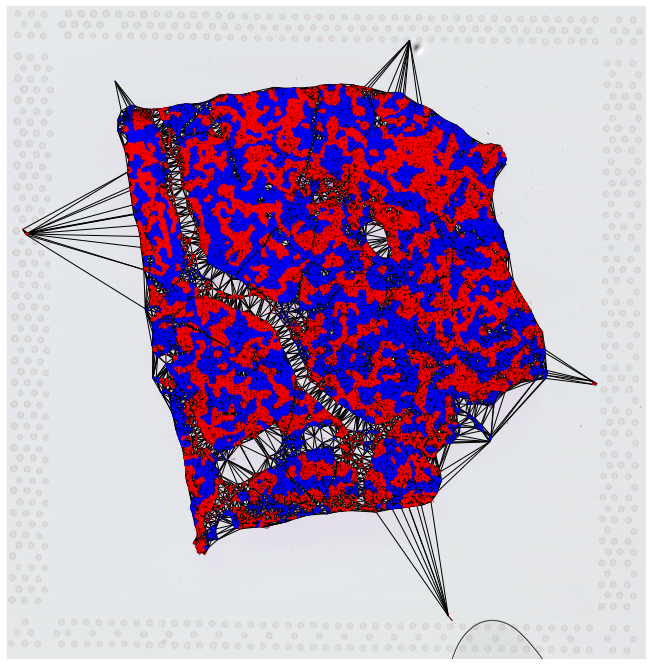

In [48]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() # get the current size of the figure in inches
# construct graph
sc =nx.draw(
    delaunay_graph_D4, pos = pos_D4, with_labels = False,
    node_size = 0.1, 
    node_color = node_colors_D4,
    ax = ax
)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
plt.imshow(img_D4)

# 2.2. Label propagation 

In [10]:
label_prob_A1 = nx.community.label_propagation_communities(delaunay_graph_A1)

In [11]:
len(label_prob_A1)

19129

In [12]:
label_prob_A1

dict_values([{'74120', '79290', '73809', '74730', '73645', '74365', '78225', '73763', '73771', '74961', '0', '78647', '78324', '78044', '74542', '74088', '78350'}, {'74290', '74235', '73902', '73537', '75863', '73590', '72', '64', '74', '74312', '73152', '73240', '73756', '73975', '74195', '63', '1', '62', '73153', '73478', '74469', '74943', '74020', '74485', '61', '73563', '74156', '70', '73202', '69'}, {'2', '79303', '80355', '13', '76413', '80255', '8', '77381', '83746', '147', '3', '80250', '85025', '79326', '5', '80905', '80650', '80919', '6', '79321', '85016', '9', '83838', '78971', '7', '4', '10', '80372', '80329', '79997', '83857'}, {'141', '142', '154', '11', '143'}, {'169', '145', '12'}, {'37', '14', '76186', '44', '49', '55', '28', '76619', '53', '76992', '54'}, {'17', '32', '45', '29', '26', '36', '39', '38', '41', '30', '15', '21'}, {'19', '16', '23', '20'}, {'35', '48', '50', '40', '43', '47', '18'}, {'33', '31', '22', '25', '24', '27'}, {'34', '51', '42', '57'}, {'89', '

In [12]:
list_label_prob_A1 = list(label_prob_A1)
list_label_prob_A1[0]

{'0',
 '73645',
 '73763',
 '73771',
 '73809',
 '74088',
 '74120',
 '74365',
 '74542',
 '74730',
 '74961',
 '78044',
 '78225',
 '78324',
 '78350',
 '78647',
 '79290'}

In [29]:
compt_color = 1
dict_num_color = {}
for li in list_label_prob_A1:
    #print(compt_color)
    for val in li:
        #print(val)
        dict_num_color[val] = compt_color
    compt_color += 1
    

In [30]:
dict_num_color

{'78225': 1,
 '74542': 1,
 '73809': 1,
 '74088': 1,
 '79290': 1,
 '73763': 1,
 '74365': 1,
 '78324': 1,
 '78647': 1,
 '74961': 1,
 '78350': 1,
 '78044': 1,
 '74120': 1,
 '74730': 1,
 '73645': 1,
 '0': 1,
 '73771': 1,
 '73153': 2,
 '70': 2,
 '74195': 2,
 '74235': 2,
 '73478': 2,
 '74020': 2,
 '73240': 2,
 '73902': 2,
 '72': 2,
 '73202': 2,
 '73563': 2,
 '74485': 2,
 '73756': 2,
 '69': 2,
 '74': 2,
 '1': 2,
 '74312': 2,
 '74469': 2,
 '74943': 2,
 '73975': 2,
 '62': 2,
 '75863': 2,
 '74290': 2,
 '73590': 2,
 '73152': 2,
 '73537': 2,
 '74156': 2,
 '63': 2,
 '64': 2,
 '61': 2,
 '6': 3,
 '80650': 3,
 '80329': 3,
 '79326': 3,
 '79321': 3,
 '2': 3,
 '76413': 3,
 '7': 3,
 '85016': 3,
 '4': 3,
 '80372': 3,
 '80250': 3,
 '79997': 3,
 '83746': 3,
 '78971': 3,
 '77381': 3,
 '79303': 3,
 '5': 3,
 '80919': 3,
 '83857': 3,
 '8': 3,
 '80255': 3,
 '10': 3,
 '85025': 3,
 '147': 3,
 '3': 3,
 '9': 3,
 '80355': 3,
 '13': 3,
 '83838': 3,
 '80905': 3,
 '11': 4,
 '142': 4,
 '143': 4,
 '141': 4,
 '154': 4,
 '12

In [33]:
nodes = delaunay_graph_A1.nodes

In [34]:
n_color = np.asarray([dict_num_color[node] for node in nodes])

In [36]:
vmin = min(n_color) # min degree value
vmax = max(n_color) 

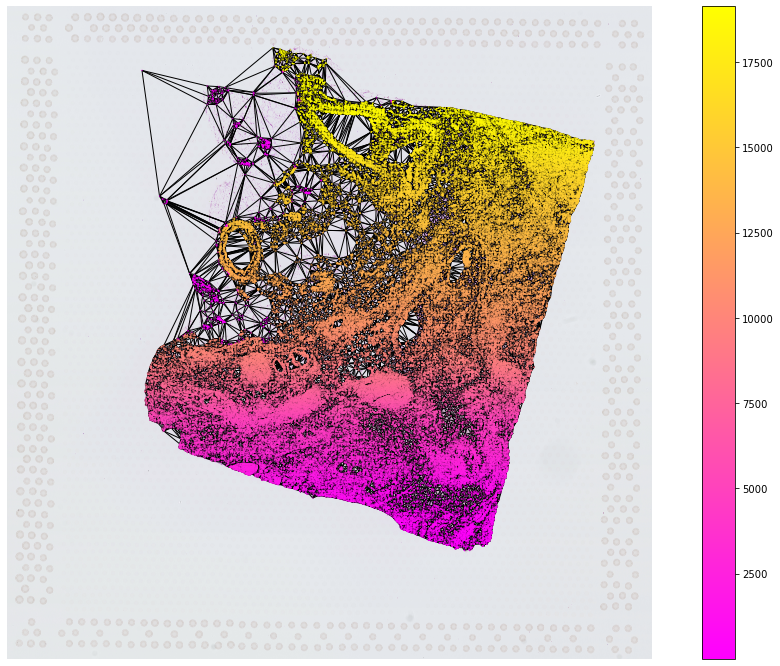

In [40]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() 
sc =nx.draw(
    delaunay_graph_A1, pos = pos_A1, with_labels = False,
    node_size = 0.1, 
    vmin = vmin,
    vmax = vmax,
    node_color = n_color,
    cmap = "spring",
    #ax = ax
)
sm = plt.cm.ScalarMappable(cmap=plt.cm.spring, norm=plt.Normalize(vmin = vmin, vmax=vmax))
plt.colorbar(sm)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
plt.imshow(img_A1)

## 2.3. Louvain communities

Find the best partition of a graph using the Louvain Community Detection Algorithm.

Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization

The algorithm works in 2 steps. On the first step it assigns every node to be in its own community and then for each node it tries to find the maximum positive modularity gain by moving each node to all of its neighbor communities. If no positive gain is achieved the node remains in its original community.

### A1 :

In [42]:
community_list_A1 = nx.community.louvain_communities(delaunay_graph_A1, seed=123)

In [71]:
len(community_list_A1)

83

In [47]:
community_list_A1

[{'2539',
  '1299',
  '1681',
  '1208',
  '820',
  '1704',
  '3786',
  '1524',
  '2621',
  '6036',
  '4490',
  '4580',
  '2298',
  '2157',
  '1277',
  '2874',
  '4647',
  '4481',
  '1923',
  '4426',
  '2069',
  '935',
  '3238',
  '839',
  '3783',
  '5934',
  '5267',
  '1929',
  '5616',
  '4239',
  '881',
  '1164',
  '1910',
  '2981',
  '1607',
  '2945',
  '4775',
  '800',
  '3630',
  '1746',
  '915',
  '4654',
  '1222',
  '1597',
  '4006',
  '3464',
  '5115',
  '2427',
  '5582',
  '5412',
  '3995',
  '2153',
  '3428',
  '3741',
  '3332',
  '1831',
  '3934',
  '3427',
  '1530',
  '1105',
  '792',
  '1118',
  '1522',
  '1437',
  '846',
  '1969',
  '4440',
  '3717',
  '1576',
  '2458',
  '2509',
  '4370',
  '5338',
  '3517',
  '2138',
  '2501',
  '4271',
  '1230',
  '4815',
  '5202',
  '1392',
  '3106',
  '2056',
  '3499',
  '5343',
  '2446',
  '2953',
  '5385',
  '1051',
  '1525',
  '5101',
  '1835',
  '5260',
  '2663',
  '2348',
  '2307',
  '2867',
  '3590',
  '4287',
  '3612',
  '2475'

In [53]:
compt_color_louvain = 1
dict_num_color_louvain = {}
for li in community_list_A1:
    #print(compt_color)
    for val in li:
        #print(val)
        dict_num_color_louvain[val] = compt_color_louvain
    compt_color_louvain += 1
   

In [54]:
dict_num_color_louvain

{'2539': 1,
 '1299': 1,
 '1681': 1,
 '1208': 1,
 '820': 1,
 '1704': 1,
 '3786': 1,
 '1524': 1,
 '2621': 1,
 '6036': 1,
 '4490': 1,
 '4580': 1,
 '2298': 1,
 '2157': 1,
 '1277': 1,
 '2874': 1,
 '4647': 1,
 '4481': 1,
 '1923': 1,
 '4426': 1,
 '2069': 1,
 '935': 1,
 '3238': 1,
 '839': 1,
 '3783': 1,
 '5934': 1,
 '5267': 1,
 '1929': 1,
 '5616': 1,
 '4239': 1,
 '881': 1,
 '1164': 1,
 '1910': 1,
 '2981': 1,
 '1607': 1,
 '2945': 1,
 '4775': 1,
 '800': 1,
 '3630': 1,
 '1746': 1,
 '915': 1,
 '4654': 1,
 '1222': 1,
 '1597': 1,
 '4006': 1,
 '3464': 1,
 '5115': 1,
 '2427': 1,
 '5582': 1,
 '5412': 1,
 '3995': 1,
 '2153': 1,
 '3428': 1,
 '3741': 1,
 '3332': 1,
 '1831': 1,
 '3934': 1,
 '3427': 1,
 '1530': 1,
 '1105': 1,
 '792': 1,
 '1118': 1,
 '1522': 1,
 '1437': 1,
 '846': 1,
 '1969': 1,
 '4440': 1,
 '3717': 1,
 '1576': 1,
 '2458': 1,
 '2509': 1,
 '4370': 1,
 '5338': 1,
 '3517': 1,
 '2138': 1,
 '2501': 1,
 '4271': 1,
 '1230': 1,
 '4815': 1,
 '5202': 1,
 '1392': 1,
 '3106': 1,
 '2056': 1,
 '3499': 1,


In [55]:
n_color_louvain = np.asarray([dict_num_color_louvain[node] for node in nodes])

In [56]:
vmin = min(n_color_louvain) # min degree value
vmax = max(n_color_louvain) 

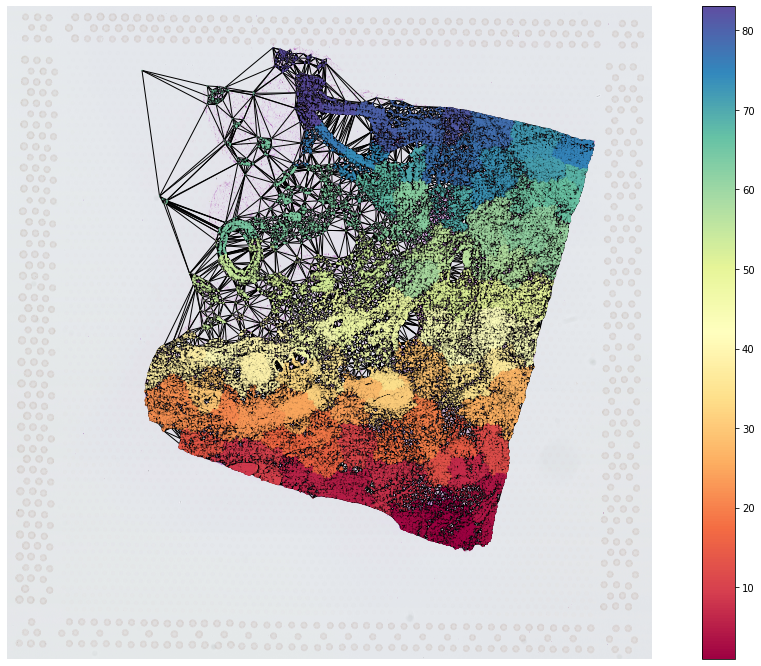

In [58]:
fig, ax = plt.subplots()
figsize = fig.get_size_inches() 
sc =nx.draw(
    delaunay_graph_A1, pos = pos_A1, with_labels = False,
    node_size = 0.1, 
    vmin = vmin,
    vmax = vmax,
    node_color = n_color_louvain,
    cmap = "Spectral",
    #ax = ax
)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral, norm=plt.Normalize(vmin = vmin, vmax=vmax))
plt.colorbar(sm)
fig.set_size_inches(figsize * 3) # size of the figure for visualization
plt.imshow(img_A1)

### B2 :

In [65]:
community_list_B2 = nx.community.louvain_communities(delaunay_graph_B2, seed=123)

In [66]:
len(community_list_B2)

115

### C3 :

In [67]:
community_list_C3 = nx.community.louvain_communities(delaunay_graph_C3, seed=123)

In [68]:
len(community_list_C3)

97

### D4 :

In [69]:
community_list_D4 = nx.community.louvain_communities(delaunay_graph_D4, seed=123)

In [70]:
len(community_list_D4)

91

## 2.4. Louvain community Detection

pip install python-louvain

In [9]:
community_louvain.best_partition(delaunay_graph_A1)

{'0': 0,
 '1': 1,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 1,
 '12': 1,
 '13': 1,
 '14': 39,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 1,
 '19': 1,
 '20': 1,
 '21': 1,
 '22': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '28': 1,
 '29': 1,
 '30': 1,
 '31': 1,
 '32': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 '49': 1,
 '50': 1,
 '51': 1,
 '52': 1,
 '53': 1,
 '54': 1,
 '55': 1,
 '56': 1,
 '57': 1,
 '58': 1,
 '59': 1,
 '60': 1,
 '61': 1,
 '62': 1,
 '63': 1,
 '64': 1,
 '65': 1,
 '66': 1,
 '67': 1,
 '68': 1,
 '69': 1,
 '70': 1,
 '71': 1,
 '72': 1,
 '73': 1,
 '74': 1,
 '75': 1,
 '76': 1,
 '77': 1,
 '78': 1,
 '79': 1,
 '80': 1,
 '81': 1,
 '82': 1,
 '83': 1,
 '84': 1,
 '85': 1,
 '86': 1,
 '87': 1,
 '88': 1,
 '89': 1,
 '90': 1,
 '91': 1,
 '92': 1,
 '93': 1,
 '94': 1,
 '95': 1,
 '96': 1,
 '97': 1,
 '98': 1,
 '99': 1,
 '100': 1

In [13]:
partition = community_louvain.best_partition(delaunay_graph_A1)

In [33]:
len(partition)

137124

In [31]:
cmap = cm.get_cmap('spring', max(partition.values()) + 1)

In [22]:
inter_list = list(partition.values())

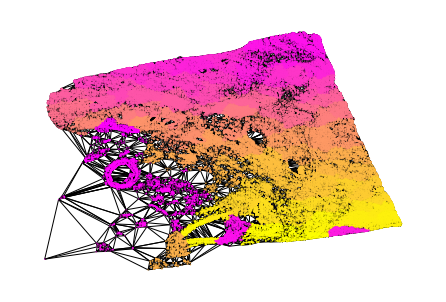

In [32]:
nx.draw(delaunay_graph_A1, pos = pos_A1, with_labels = False, nodelist=partition.keys(), node_size=0.1, cmap=cmap, node_color=inter_list)
plt.show()

## 2.5. Modularity 

In [38]:
communities = sorted(nxcom.greedy_modularity_communities(g_B2), key=len, reverse=True)

In [39]:
communities

[frozenset({'32244',
            '190689',
            '15113',
            '180488',
            '176947',
            '134479',
            '57961',
            '144338',
            '125445',
            '48467',
            '52374',
            '37273',
            '100983',
            '95600',
            '109764',
            '142712',
            '104555',
            '103234',
            '70138',
            '103100',
            '50403',
            '44548',
            '163518',
            '38822',
            '138070',
            '73075',
            '108944',
            '28434',
            '155380',
            '41195',
            '149808',
            '187053',
            '152550',
            '128726',
            '32829',
            '25378',
            '53261',
            '64979',
            '162716',
            '148826',
            '41230',
            '78064',
            '17817',
            '15332',
            '12362',
            '71772',
            

In [40]:
len(communities)

26